In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/hp/Downloads/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
x = df.drop(columns = ['Id', 'Species'], axis=1)
x = x.iloc[:, 0:].values

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


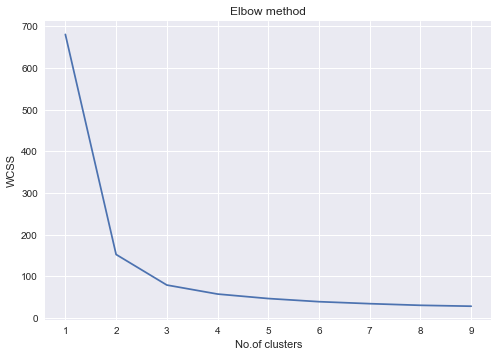

In [3]:
#k means algorithm

from sklearn.cluster import KMeans
wcss = []   #within cluster sum of squares

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.style.use("seaborn")
plt.title('Elbow method')
plt.xlabel('No.of clusters')
plt.ylabel('WCSS')
plt.plot(range(1, 10), wcss)

In [6]:
elbow = 3
kmeans = KMeans(n_clusters=elbow, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 10)
y_kmeans = kmeans.fit_predict(x)

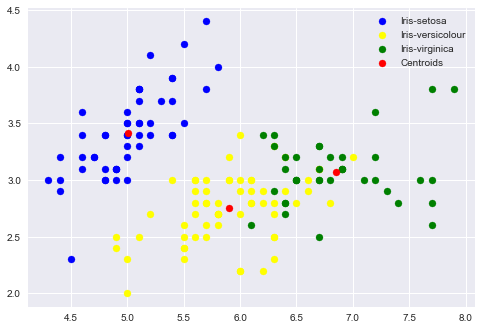

In [7]:
#plots
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], c = 'green', label = 'Iris-virginica')

#centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], c = 'red', label = 'Centroids')

plt.legend()